In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn tensorflow

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.5-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2025-06-16 12:31:06.184655: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-16 12:31:06.207286: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-16 12:31:06.367991: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-16 12:31:06.447073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750077066.531928   42567 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750077066.56

In [3]:
churn_data = pd.read_csv("/workspaces/Projects/Classification/churn.csv")

In [4]:
print(churn_data.head())
print(churn_data.shape)
print(churn_data.ndim)
print(churn_data['Churn'].value_counts().rename('count'))
print(churn_data['Churn'].value_counts(normalize=True).rename('%').mul(100))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

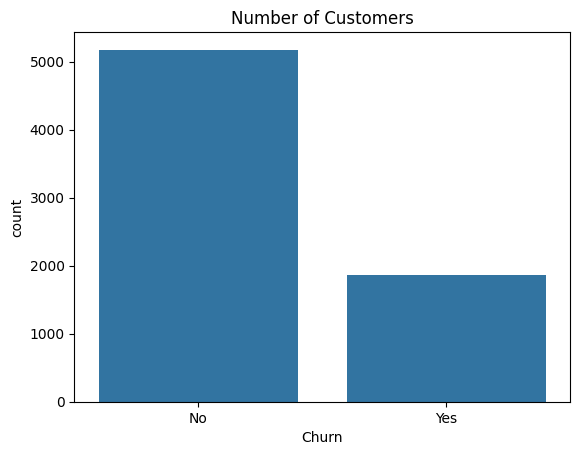

In [5]:
sns.countplot(data=churn_data, x='Churn')
plt.title('Number of Customers')
plt.show()

In [6]:
print(churn_data.info())
print(churn_data.sample(20))
print(churn_data.describe())
print(churn_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print('Missing data sum:')
print(churn_data.isnull().sum())
print('\nMissing data percentage (%):')
print(churn_data.isnull().sum() / churn_data.count() * 100)

Missing data sum:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing data percentage (%):
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0

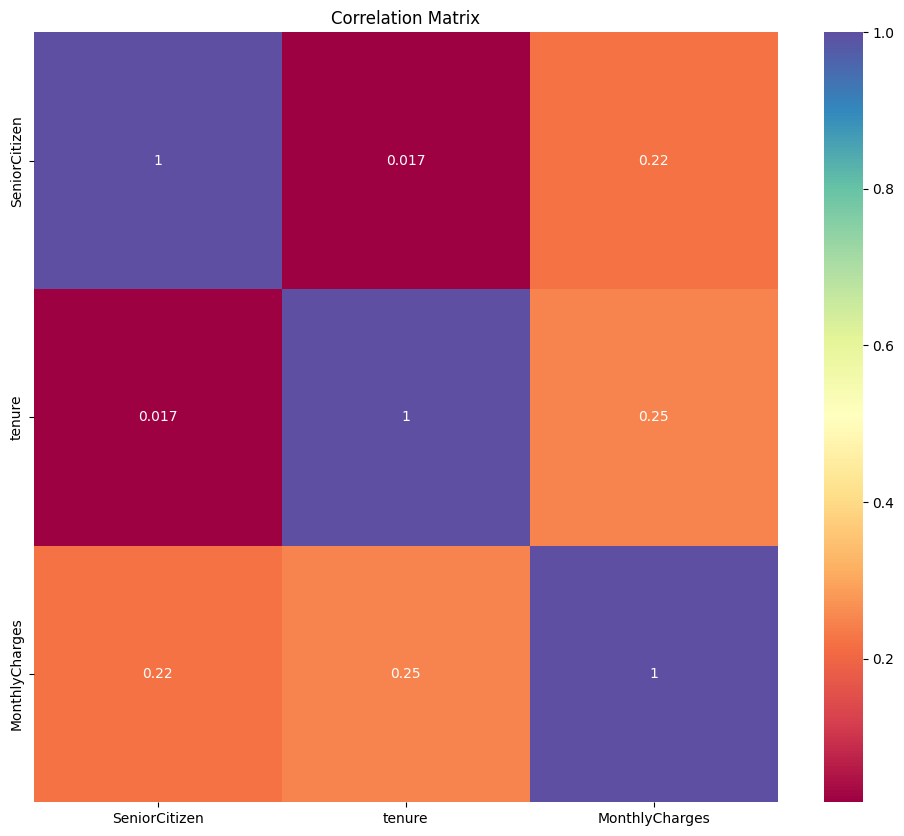

In [8]:
numerical_cols = churn_data.select_dtypes(include=[np.number]).columns
corr = churn_data[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")
plt.show()

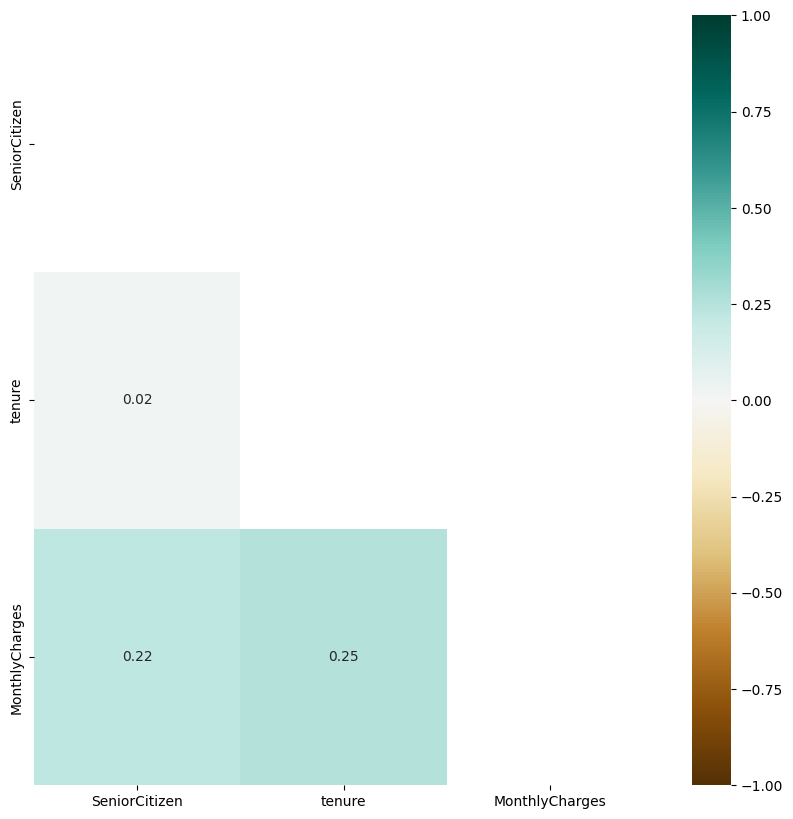

In [9]:
corr_matrix = corr.round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [10]:
cat_features = [col for col in churn_data.columns if churn_data[col].dtypes == 'object' and col != 'customerID']
print('Number of categorical variables:', len(cat_features))
print('*'*80)
print('Categorical variables column name:', cat_features)

Number of categorical variables: 17
********************************************************************************
Categorical variables column name: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [11]:
numerical_features = [col for col in churn_data.columns if churn_data[col].dtypes != 'object' and col not in ['customerID']]
print('Number of numerical variables:', len(numerical_features))
print('*'*80)
print('Numerical Variables Column:', numerical_features)

Number of numerical variables: 3
********************************************************************************
Numerical Variables Column: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [12]:
print('Duplicates:', churn_data.duplicated().sum())

Duplicates: 0


In [13]:
for col in cat_features:
    print(f"Unique values in {col}:", churn_data[col].unique())
for col in numerical_features:
    print(f"Number of unique values in {col}:", churn_data[col].nunique())

Unique values in gender: ['Female' 'Male']
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies: ['No' 'Yes' 'No internet service']
Unique values in Contract: ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling: ['Yes' 'No']
Unique values in PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in TotalCharges: ['29.85' '1889.5' '108.15' ... '34

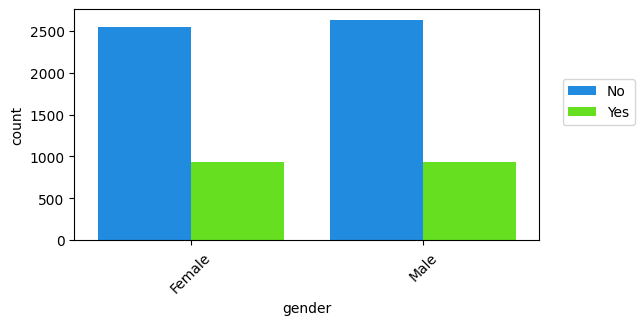

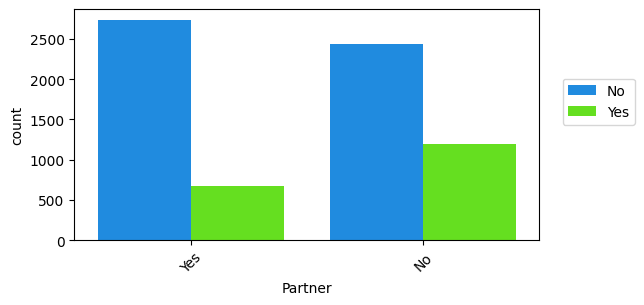

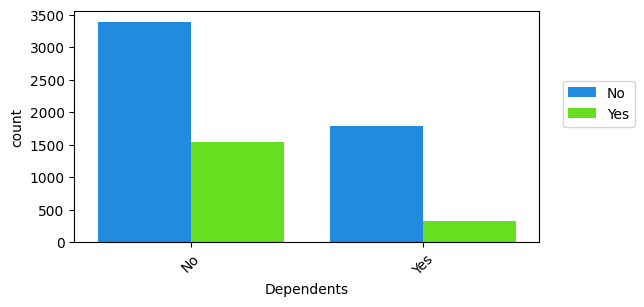

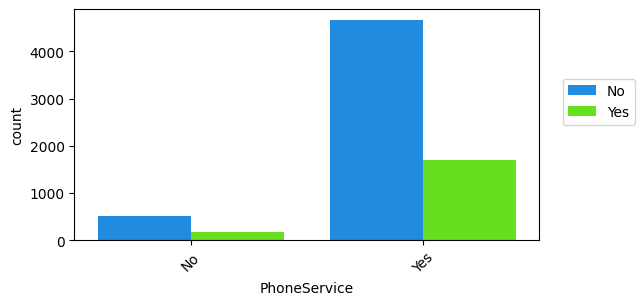

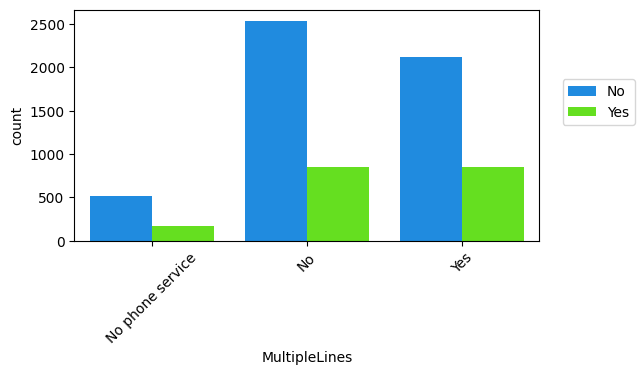

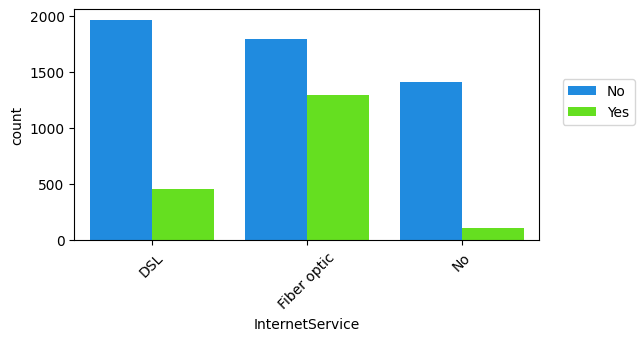

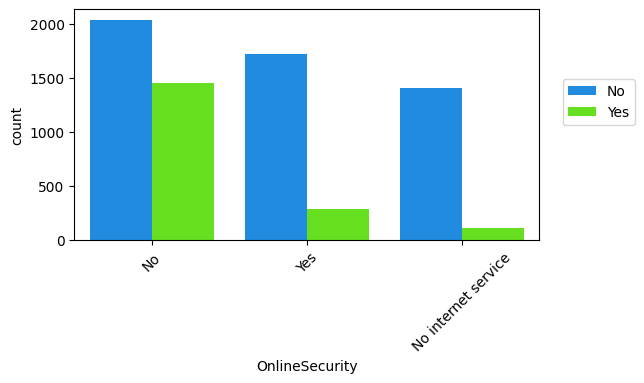

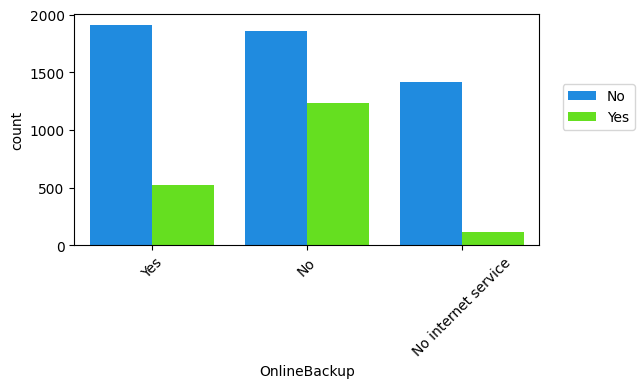

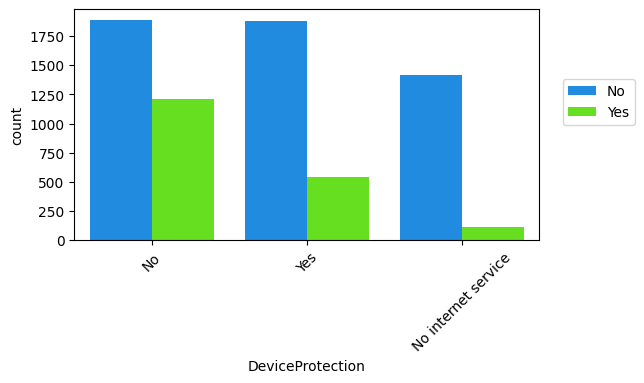

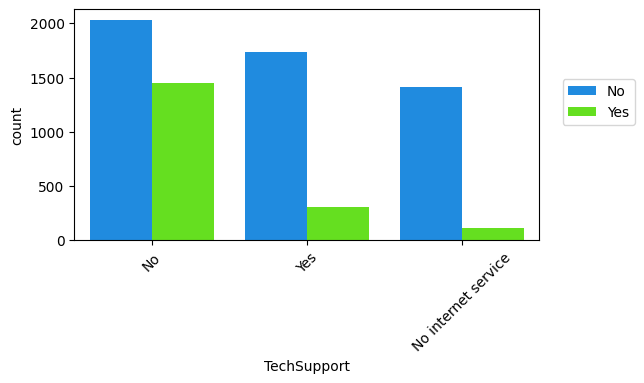

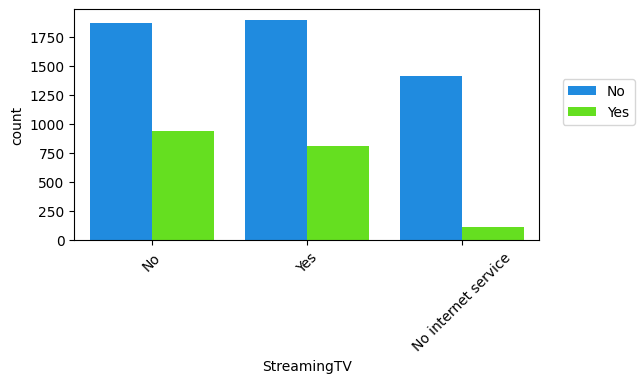

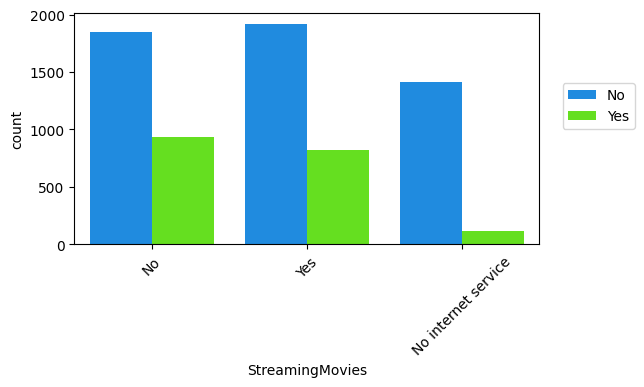

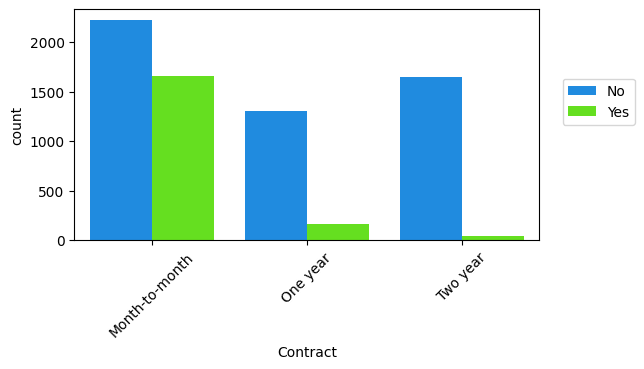

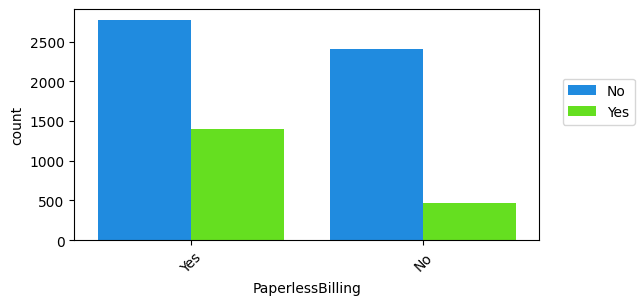

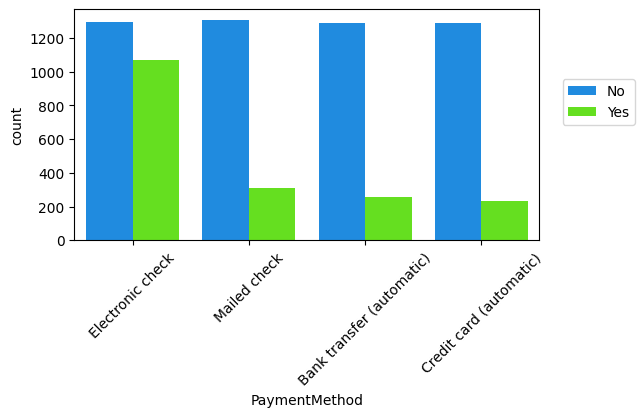

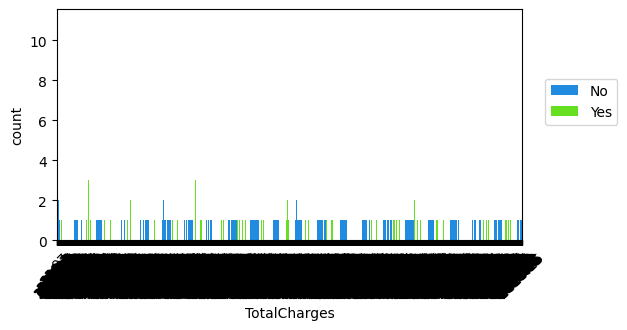

/tmp/ipykernel_42567/2245480841.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=(1.05, 0.5))


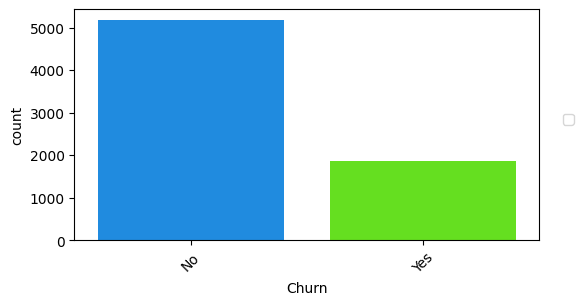

In [14]:
for col in cat_features:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=churn_data, x=col, hue='Churn', palette='gist_rainbow_r')
    plt.legend(loc=(1.05, 0.5))
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipykernel_42567/2950577639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_data, x='Churn', y=col, palette='gist_rainbow_r')


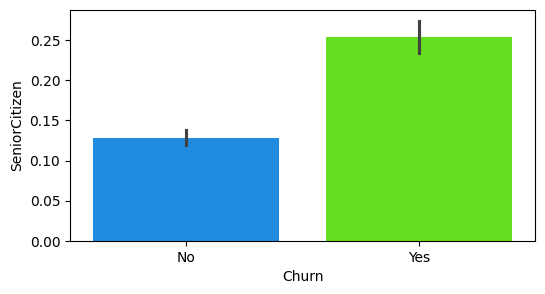

/tmp/ipykernel_42567/2950577639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_data, x='Churn', y=col, palette='gist_rainbow_r')


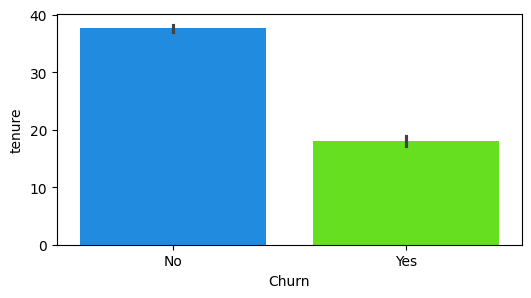

/tmp/ipykernel_42567/2950577639.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_data, x='Churn', y=col, palette='gist_rainbow_r')


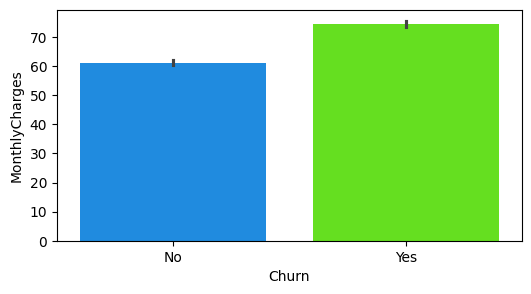

In [15]:
for col in numerical_features:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.barplot(data=churn_data, x='Churn', y=col, palette='gist_rainbow_r')
    plt.show()

In [16]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
churn_data['TotalCharges'] = churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].mean())

In [17]:
print(churn_data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [18]:
train = churn_data.drop(['customerID'], axis=1)

In [19]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes(include=[np.number])

In [20]:
train_data_cat_encoded = pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())

In [21]:
data = pd.concat([train_data_cat_encoded, train_data_num], axis=1)

In [22]:
y = data['Churn_Yes']
x = data.drop(['Churn_Yes', 'Churn_No'], axis=1)

In [23]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
print(X_train.shape, X_test.shape)

(4930, 45) (2113, 45)


In [25]:
accuracy = {}

Logistic Regression Accuracy: 0.7993374349266446


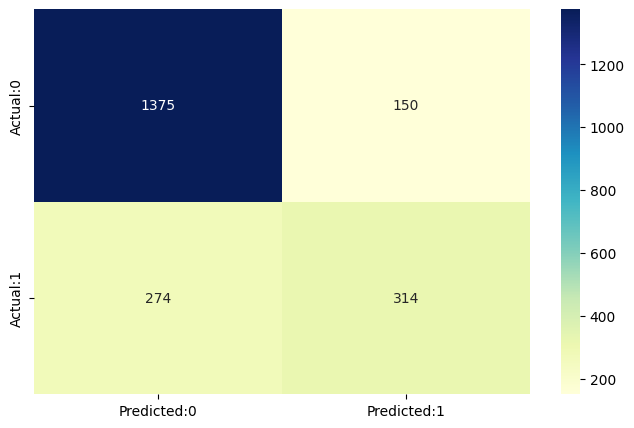

              precision    recall  f1-score   support

       False       0.83      0.90      0.87      1525
        True       0.68      0.53      0.60       588

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [26]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1) * 100
cm = confusion_matrix(y_test, y_pred1)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()
print(classification_report(y_test, y_pred1))

Decision Tree Accuracy: 0.7875059157595835


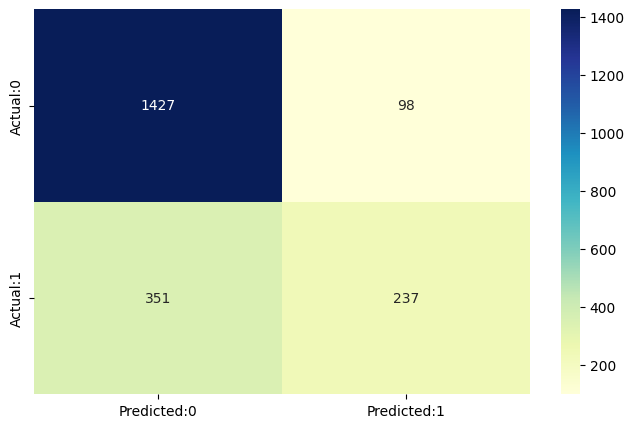

              precision    recall  f1-score   support

       False       0.80      0.94      0.86      1525
        True       0.71      0.40      0.51       588

    accuracy                           0.79      2113
   macro avg       0.76      0.67      0.69      2113
weighted avg       0.78      0.79      0.77      2113



In [27]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2))
accuracy[str(dtc)] = accuracy_score(y_test, y_pred2) * 100
cm = confusion_matrix(y_test, y_pred2)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()
print(classification_report(y_test, y_pred2))

Random Forest Accuracy: 0.7936583057264552


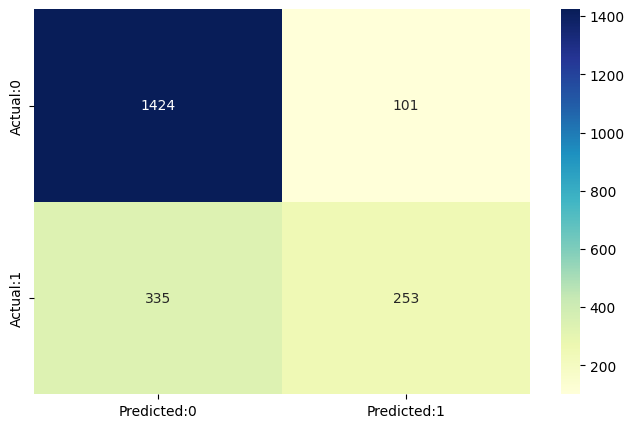

              precision    recall  f1-score   support

       False       0.81      0.93      0.87      1525
        True       0.71      0.43      0.54       588

    accuracy                           0.79      2113
   macro avg       0.76      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [28]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred3))
accuracy[str(rfc)] = accuracy_score(y_test, y_pred3) * 100
cm = confusion_matrix(y_test, y_pred3)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()
print(classification_report(y_test, y_pred3))

Gradient Boosting Accuracy: 0.7974443918599148


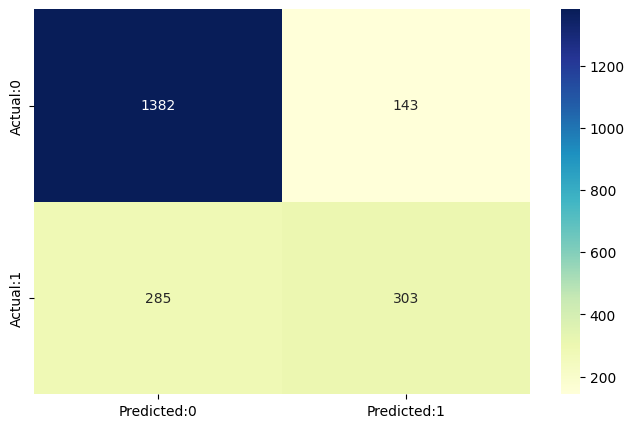

              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1525
        True       0.68      0.52      0.59       588

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [29]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred4))
accuracy[str(gbc)] = accuracy_score(y_test, y_pred4) * 100
cm = confusion_matrix(y_test, y_pred4)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()
print(classification_report(y_test, y_pred4))

SVC Accuracy: 0.7931850449597728


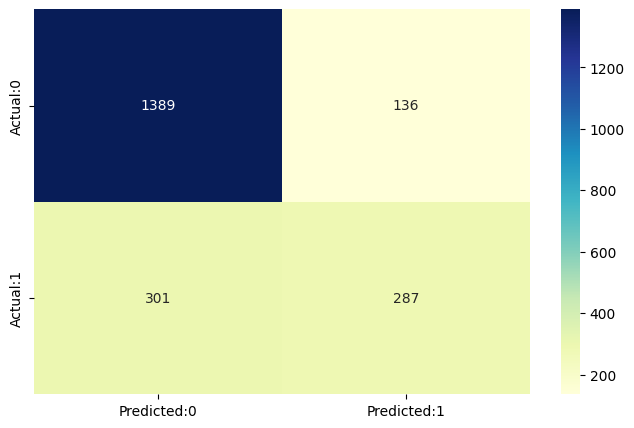

              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1525
        True       0.68      0.49      0.57       588

    accuracy                           0.79      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.78      0.79      0.78      2113



In [30]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred5 = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred5))
accuracy[str(svc)] = accuracy_score(y_test, y_pred5) * 100
cm = confusion_matrix(y_test, y_pred5)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()
print(classification_report(y_test, y_pred5))

In [31]:
print("Accuracy scores:", accuracy)

Accuracy scores: {'LogisticRegression(max_iter=200)': 79.93374349266446, 'DecisionTreeClassifier(max_depth=3)': 78.75059157595835, 'RandomForestClassifier(max_depth=5)': 79.36583057264552, 'GradientBoostingClassifier()': 79.74443918599148, 'SVC()': 79.31850449597728}


In [32]:
smote = SMOTE()
x1, y1 = smote.fit_resample(x, y)
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, shuffle=True, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7243, 45) (3105, 45) (7243,) (3105,)


Logistic Regression (SMOTE) Accuracy: 0.7809983896940419


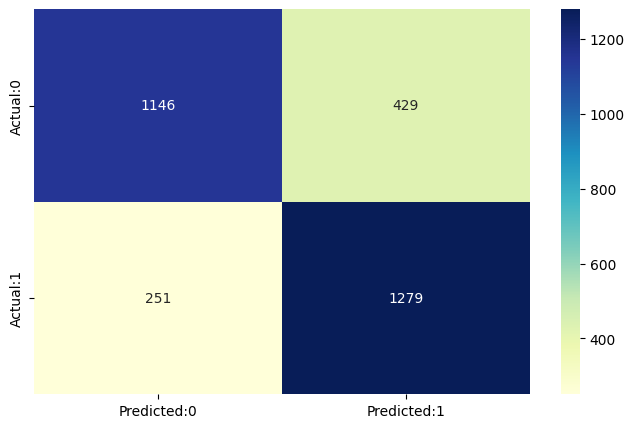

              precision    recall  f1-score   support

       False       0.82      0.73      0.77      1575
        True       0.75      0.84      0.79      1530

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105



In [33]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print("Logistic Regression (SMOTE) Accuracy:", accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1) * 100
cm = confusion_matrix(y_test, y_pred1)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()
print(classification_report(y_test, y_pred1))

KNN (SMOTE) Accuracy: 0.7913043478260869


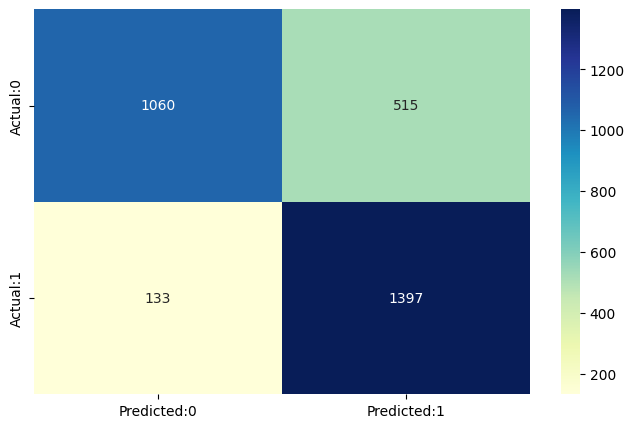

              precision    recall  f1-score   support

       False       0.89      0.67      0.77      1575
        True       0.73      0.91      0.81      1530

    accuracy                           0.79      3105
   macro avg       0.81      0.79      0.79      3105
weighted avg       0.81      0.79      0.79      3105



In [34]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predict = knn_model.predict(X_test)
print("KNN (SMOTE) Accuracy:", accuracy_score(y_test, knn_predict))
accuracy[str(knn_model)] = accuracy_score(y_test, knn_predict) * 100
cm = confusion_matrix(y_test, knn_predict)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()
print(classification_report(y_test, knn_predict))

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(4800, input_shape=(x.shape[1],), activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
])
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=0)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Neural Network 1 Accuracy:", acc)
y_pred = model.predict(X_test).flatten()
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-16 12:31:44.034495: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4800)           │       220,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │     9,602,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     2,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         1,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,825,801 (48.93 MB)

 Trainable params: 12,825,801 (48.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
cb = EarlyStopping(monitor='accuracy', min_delta=0.001, patience=100, mode='auto')
model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.30, callbacks=[cb], verbose=0)
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Neural Network 2 Accuracy:", acc)
y_pred = model.predict(X_test).flatten()
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()